In [181]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

(175, 400)

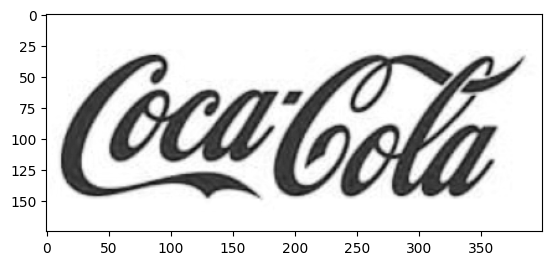

In [182]:
# Cargamos la imagen a procesar
template = cv.imread(r'template\pattern.png',0)
path_temp='template/pattern.png'
plt.figure()
plt.imshow(template, cmap="gray")
template.shape

In [183]:
w_original, h_original = template.shape[::-1]
print (template.shape)
edges = cv.Canny(template, threshold1=5, threshold2=130)
edges = cv.bitwise_not(edges)
print(edges.shape)

(175, 400)
(175, 400)


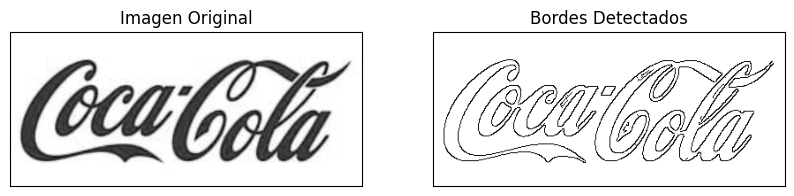

In [184]:
# Visualizamos la imagen original y los bordes detectados
plt.figure(figsize=(10, 5))

# Mostramos la imagen original en el subplot de la izquierda
plt.subplot(1, 2, 1)
plt.imshow(template, cmap='gray')
plt.title('Imagen Original')
plt.xticks([]), plt.yticks([])

# Mostramos los bordes detectados en el subplot de la derecha
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Bordes Detectados')
plt.xticks([]), plt.yticks([])

plt.show()

In [185]:
def detect_img(template_path,img_det_path,method, threshold, multi_img,black_white,multi_det):
    
    template_gris = cv.imread(template_path,0)
    template_gris_bordes = cv.Canny(template_gris, threshold1=400, threshold2=400)
    w_temp, h_temp = template_gris.shape[::-1]
    
    
    img_orig = cv.imread(img_det_path)
    img_rgb = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
    img_det_gris = cv.cvtColor(img_orig, cv.COLOR_BGR2GRAY)
    img_gris_bordes = cv.Canny(img_det_gris, threshold1=400, threshold2=400)
    
    # Visualizamos la imagen original y los bordes detectados
    plt.figure(figsize=(10, 5))

    # Mostramos la imagen original en el subplot de la izquierda
    plt.subplot(1, 2, 1)
    plt.imshow(template_gris_bordes, cmap='gray')
    plt.title('Template')
    plt.xticks([]), plt.yticks([])

    # Mostramos los bordes detectados en el subplot de la derecha
    plt.subplot(1, 2, 2)
    plt.imshow(img_gris_bordes, cmap='gray')
    plt.title('Imagen a detectar')
    plt.xticks([]), plt.yticks([])
    plt.show()
    
    if black_white:
        img_gris_bordes = cv.bitwise_not(img_gris_bordes)
    w_img_det, h_img_det = template_gris.shape[::-1]
    
    
    template_copy = template_gris_bordes.copy()
    
    if (w_temp<w_img_det) :
        aspect_ratio = template_copy.shape[0] / template_copy.shape[1]
        target_width = w_img_det
        target_height = int(target_width * aspect_ratio)
        template_copy = cv.resize(template_copy, (target_width, target_height))
        
    
    maximo = 0
    
    meth = eval(method)
    scales = np.linspace(1, 0.1, 10)
    final_scale = scales[0]
    for scale in scales:
        print("Scale: ",scale,"with template",w_temp,"high template",h_temp)
        print(w_temp,"<",w_img_det,"?", h_temp,"<",h_img_det,"?")
        if ((w_temp<w_img_det) & (h_temp<h_img_det)):
            try:
                # res = cv.matchTemplate(edges, template_resized, meth)
                # min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
                res = cv.matchTemplate(img_gris_bordes,template_copy,meth)
                min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
                loc = np.where( res >= threshold)
                if (len(loc[0]) > 1):
                    if multi_det==0:
                    
                        print(f"Escala {scale} aceptada","max val:",max_val)
                        final_scale=scale
                        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
                        top_left = max_loc
                        bottom_right = (top_left[0] + w_temp, top_left[1] + h_temp)
                        cv.rectangle(img_rgb, top_left, bottom_right, (0, 0, 255), 3) 
                        cv.putText(img_rgb, str(int(max_val)), (top_left[0], top_left[1] - 10), cv.FONT_HERSHEY_DUPLEX, 0.7, (0, 0, 255), 1)
                        break;   
                # imprime_rtdos(img_salida,img_template,final_scale,method,min_loc,max_loc)
                # if max_val >= maximo:
                #     maximo = max_val
                #     final_scale = scale
                #     print(f"final scale: {final_scale}")
            except cv.error as e:
                print(f"Error al realizar la coincidencia de plantillas a escala {scale}: {e}")
                
        print(scale)
        template_copy = cv.resize(template_copy, None, fx=scale, fy=scale)
        w_temp, h_temp = template_copy.shape[::-1]

    
    # try:
    #     meth = eval(method)
    #     res = cv.matchTemplate(img_gris_bordes, template_copy, meth)
    #     # print(f"Escala final aplicada:{final_scale}")
    #     min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # except cv.error as e:
    #     # print(f"Error al realizar la coincidencia de plantillas a escala final {final_scale}: {e}")
    #     print("error")
    # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
    # if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
    #     top_left = min_loc
    # else:
    #     top_left = max_loc
    # print(f"Mejor escala: {final_scale}")
    
    # Marcamos el lugar donde lo haya encontrado
    #----------------------------------------
    # bottom_right = (top_left[0] + w_img_det, top_left[1] + h_img_det)
    # cv.rectangle(img_salida, top_left, bottom_right, 0, 5)
    
    # cv.rectangle(img_rgb,top_left, bottom_right, (0,0,255), 2)
    # cv.putText(img_rgb, str(round(max_val, 2)), (top_left[0], top_left[1] - 10), cv.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 1)
    
    # Mostramos la imagen original con el rectángulo delimitador
    # img_salida_rgb = cv.cvtColor(img_salida, cv.COLOR_BGR2RGB)
    print(final_scale)
    plt.imshow(img_rgb)
    plt.title('Detected Point')
    plt.xticks([]), plt.yticks([])
    plt.suptitle(method)
    plt.show()

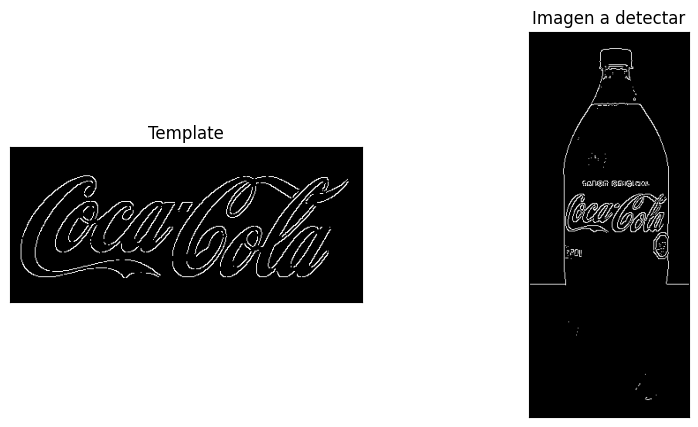

Scale:  1.0 with template 400 high template 175
400 < 400 ? 175 < 175 ?
1.0
Scale:  0.9 with template 400 high template 175
400 < 400 ? 175 < 175 ?
0.9
Scale:  0.8 with template 360 high template 158
360 < 400 ? 158 < 175 ?
Error al realizar la coincidencia de plantillas a escala 0.8: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\templmatch.cpp:1175: error: (-215:Assertion failed) _img.size().height <= _templ.size().height && _img.size().width <= _templ.size().width in function 'cv::matchTemplate'

0.8
Scale:  0.7 with template 288 high template 126
288 < 400 ? 126 < 175 ?
Error al realizar la coincidencia de plantillas a escala 0.7: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\templmatch.cpp:1175: error: (-215:Assertion failed) _img.size().height <= _templ.size().height && _img.size().width <= _templ.size().width in function 'cv::matchTemplate'

0.7
Scale:  0.6 with template 202 high template 88
202 < 400 ? 88 < 175 ?
Escala 0.6

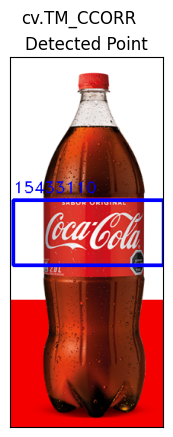

In [186]:

path_img=r"C:\Users\santi\OneDrive\Escritorio\Entrgas_Vis_Comp\EntregasVisComp\TP3\images\coca_logo_1.png"
detect_img(path_temp, path_img,'cv.TM_CCORR',0.30,0,False,multi_det=0)

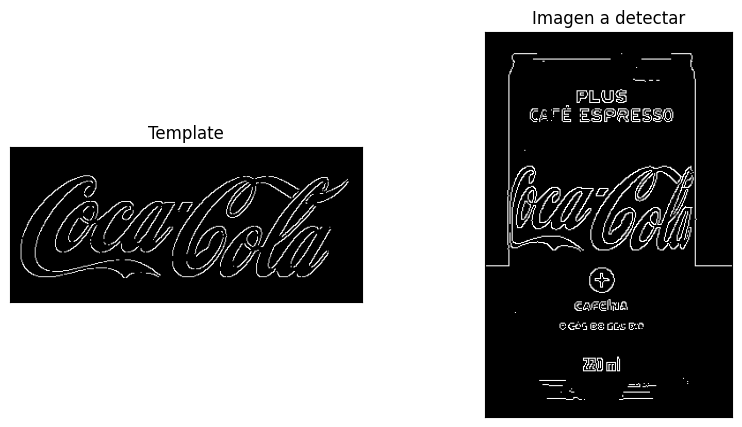

Scale:  1.0 with template 400 high template 175
400 < 400 ? 175 < 175 ?
1.0
Scale:  0.9 with template 400 high template 175
400 < 400 ? 175 < 175 ?
0.9
Scale:  0.8 with template 360 high template 158
360 < 400 ? 158 < 175 ?
Error al realizar la coincidencia de plantillas a escala 0.8: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\templmatch.cpp:1175: error: (-215:Assertion failed) _img.size().height <= _templ.size().height && _img.size().width <= _templ.size().width in function 'cv::matchTemplate'

0.8
Scale:  0.7 with template 288 high template 126
288 < 400 ? 126 < 175 ?
Error al realizar la coincidencia de plantillas a escala 0.7: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\templmatch.cpp:1175: error: (-215:Assertion failed) _img.size().height <= _templ.size().height && _img.size().width <= _templ.size().width in function 'cv::matchTemplate'

0.7
Scale:  0.6 with template 202 high template 88
202 < 400 ? 88 < 175 ?
Escala 0.6

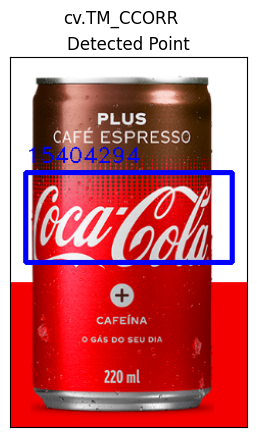

In [187]:
path_img=r"C:\Users\santi\OneDrive\Escritorio\Entrgas_Vis_Comp\EntregasVisComp\TP3\images\coca_logo_2.png"
detect_img(path_temp, path_img,'cv.TM_CCORR',0.9,0,False,multi_det=0)

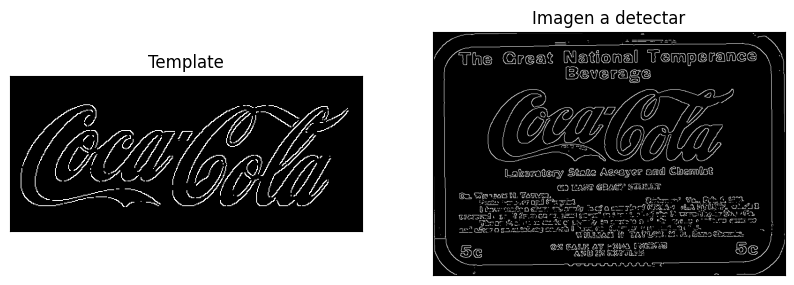

Scale:  1.0 with template 400 high template 175
400 < 400 ? 175 < 175 ?
1.0
Scale:  0.9 with template 400 high template 175
400 < 400 ? 175 < 175 ?
0.9
Scale:  0.8 with template 360 high template 158
360 < 400 ? 158 < 175 ?
Escala 0.8 aceptada max val: 209196384.0
0.8


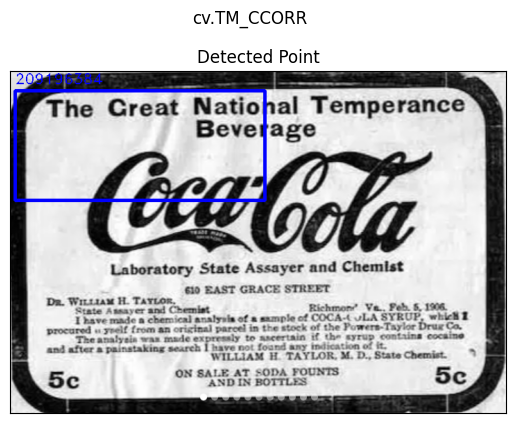

In [188]:
path_img=r"C:\Users\santi\OneDrive\Escritorio\Entrgas_Vis_Comp\EntregasVisComp\TP3\images\coca_retro_1.png"
detect_img(path_temp, path_img,'cv.TM_CCORR',0.40,0,True,multi_det=0)